In [10]:
from linares_plot import *
import sys, os
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from timecourse import *
from tiemcourse_by_subject import *
from mlxtend.evaluate import permutation_test


In [2]:
%load_ext autoreload
%autoreload 2

# Decoding distractor

In [ ]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testD_runsout100.xlsx', 
               'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testD_runsout100.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testD_runsout100.xlsx', 
                     'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testD_runsout100.xlsx']


In [5]:
df_distractor=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_distractor_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)
df_distractor['decoding_item'] = df_distractor['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor['training_item'] = df_distractor['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)
df_distractor_shuff['decoding_item'] = df_distractor_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor_shuff['training_item'] = df_distractor_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])

In [11]:
df = df_distractor
df_shuff = df_distractor_shuff

df_time_distractor=[]


for cond in ['1_0.2','1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target', 'distractor']:
                for t in df.times.unique(): 
                    #
                    decoding_item='distractor'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    #decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff.mean()
                    pval_shuff = permutation_test([dec_sig.decoding.iloc[0]], list(dec_shuff), method='approximate', num_rounds=1000, seed=0)
                    df_time_distractor.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item, pval_shuff] )   
                    ####)
#
df_time_distractor = pd.DataFrame(df_time_distractor)
df_time_distractor.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item', 'pval']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


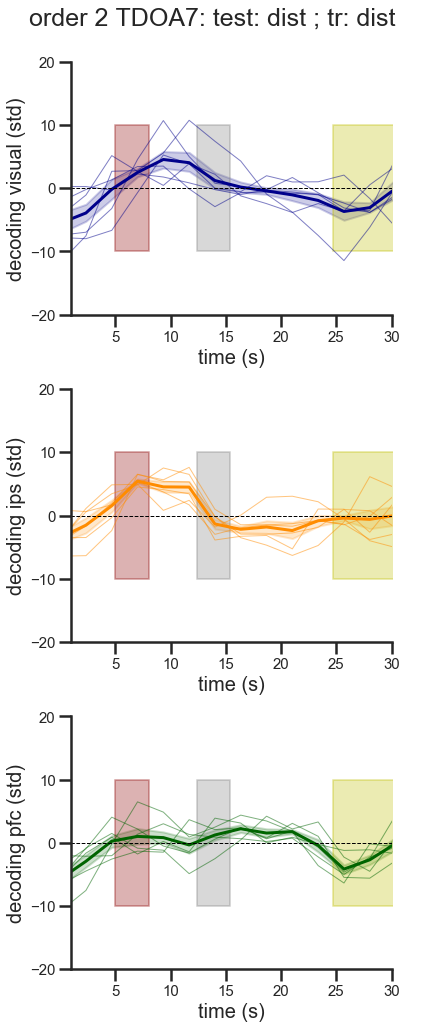

In [24]:
df_x = df_time_distractor.loc[(df_time_distractor['training_item']=='distractor') & (df_time_distractor['condition']=='2_7') ]
tiemcourse_by_subject(df_x, '2_7', 'order 2 TDOA7: test: dist ; tr: dist', ylims=[-20,20])

In [ ]:
### With significance!

In [25]:
from tiemcourse_by_subject_permtest import *

## Trained in target

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


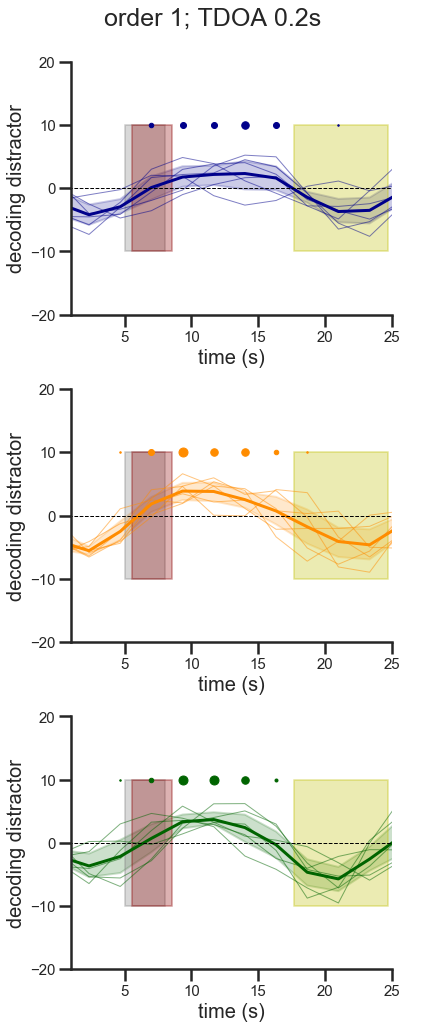

In [38]:
df_x = df_time_distractor.loc[(df_time_distractor['training_item']=='target') & (df_time_distractor['condition']=='1_0.2') ]
tiemcourse_by_subject_permtest(df_x, '1_0.2', 'order 1; TDOA 0.2s', ylims=[-20,20], decoding_thing='distractor')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


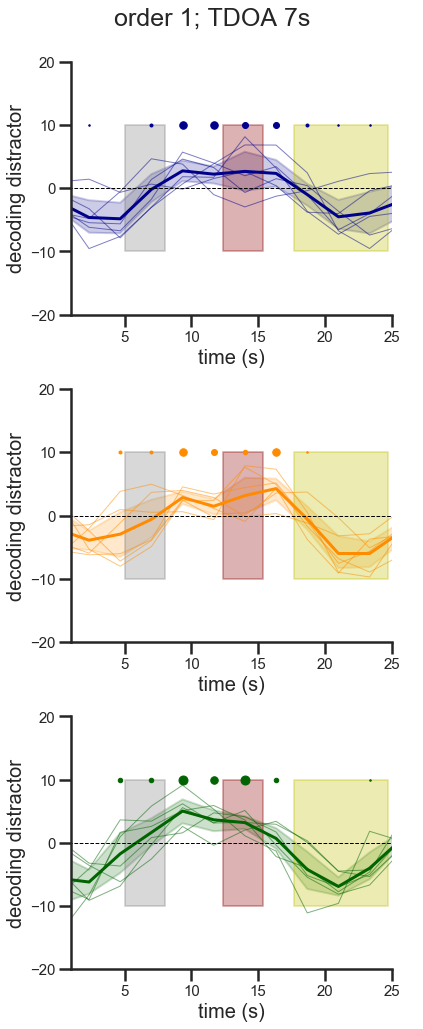

In [39]:
df_x = df_time_distractor.loc[(df_time_distractor['training_item']=='target') & (df_time_distractor['condition']=='1_7') ]
tiemcourse_by_subject_permtest(df_x, '1_7', 'order 1; TDOA 7s', ylims=[-20,20], decoding_thing='distractor')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


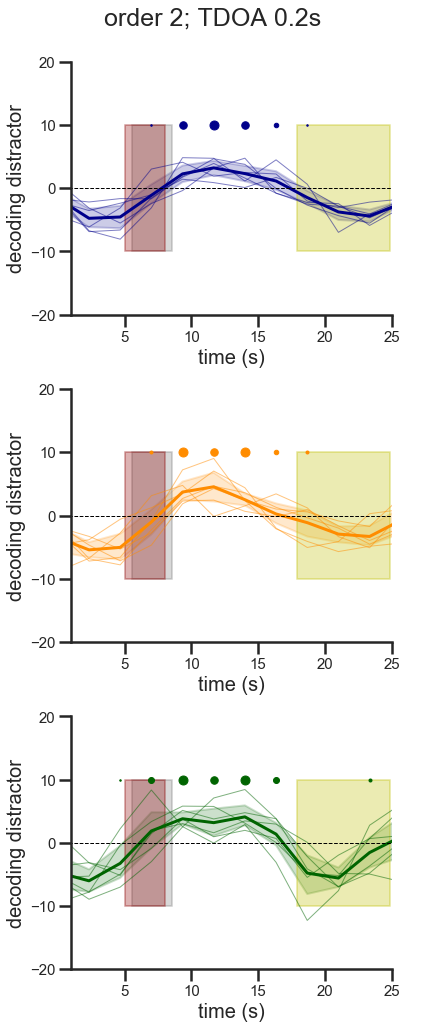

In [40]:
df_x = df_time_distractor.loc[(df_time_distractor['training_item']=='target') & (df_time_distractor['condition']=='2_0.2') ]
tiemcourse_by_subject_permtest(df_x, '2_0.2', 'order 2; TDOA 0.2s', ylims=[-20,20], decoding_thing='distractor')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


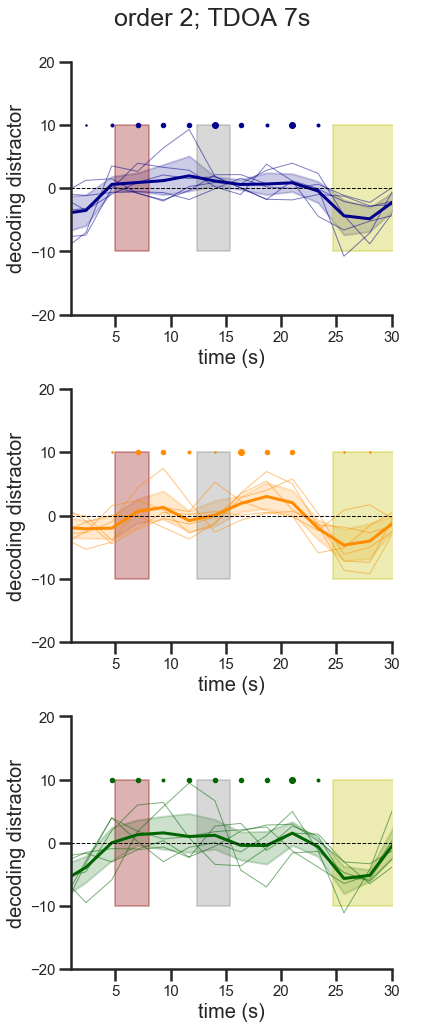

In [41]:
df_x = df_time_distractor.loc[(df_time_distractor['training_item']=='target') & (df_time_distractor['condition']=='2_7') ]
tiemcourse_by_subject_permtest(df_x, '2_7', 'order 2; TDOA 7s', ylims=[-20,20], decoding_thing='distractor')

## Trained in distractor

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


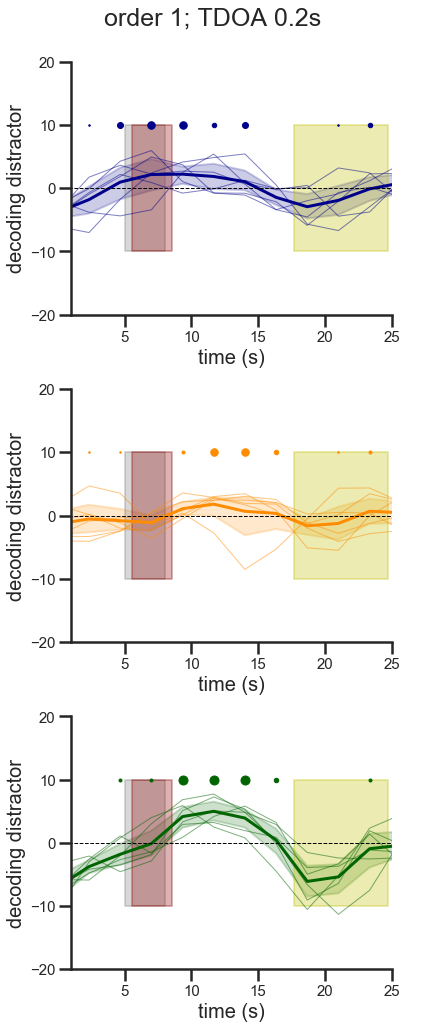

In [42]:
df_x = df_time_distractor.loc[(df_time_distractor['training_item']=='distractor') & (df_time_distractor['condition']=='1_0.2') ]
tiemcourse_by_subject_permtest(df_x, '1_0.2', 'order 1; TDOA 0.2s', ylims=[-20,20], decoding_thing='distractor')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


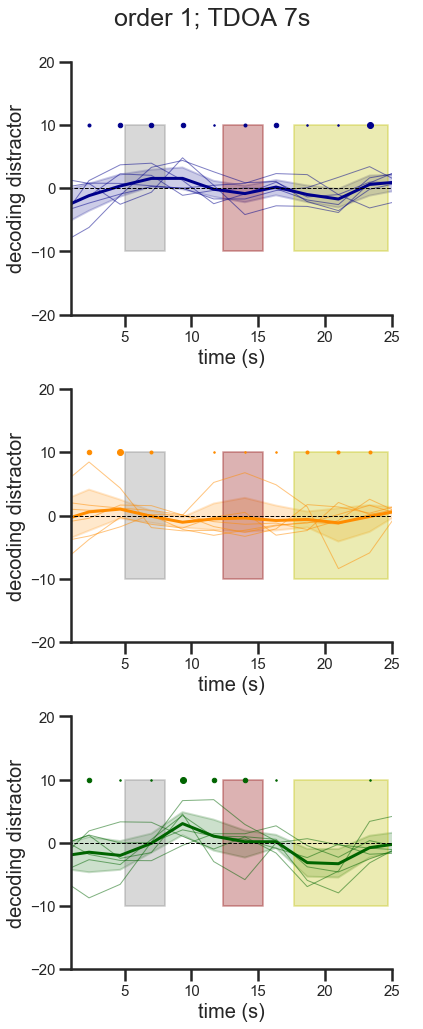

In [43]:
df_x = df_time_distractor.loc[(df_time_distractor['training_item']=='distractor') & (df_time_distractor['condition']=='1_7') ]
tiemcourse_by_subject_permtest(df_x, '1_7', 'order 1; TDOA 7s', ylims=[-20,20], decoding_thing='distractor')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


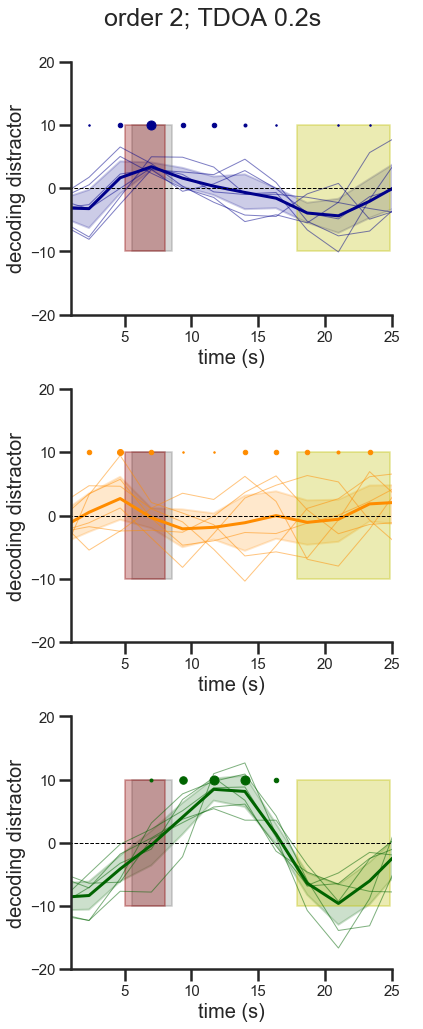

In [44]:
df_x = df_time_distractor.loc[(df_time_distractor['training_item']=='distractor') & (df_time_distractor['condition']=='2_0.2') ]
tiemcourse_by_subject_permtest(df_x, '2_0.2', 'order 2; TDOA 0.2s', ylims=[-20,20], decoding_thing='distractor')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


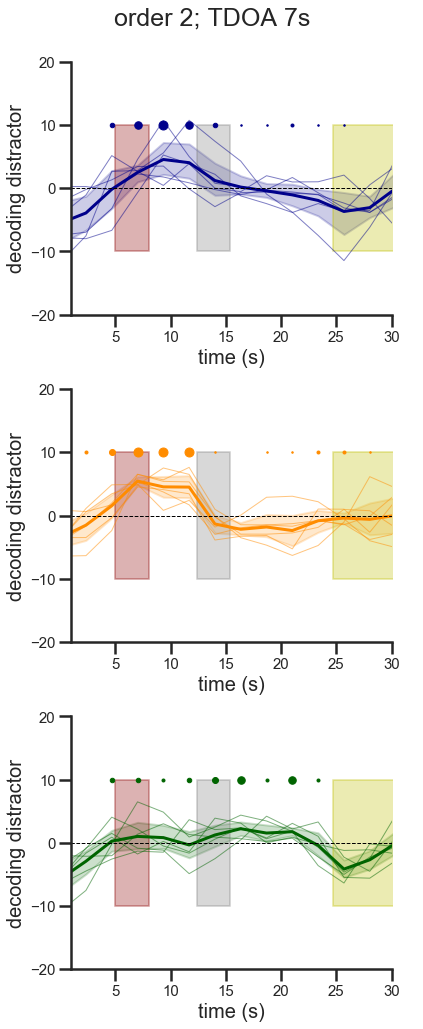

In [45]:
df_x = df_time_distractor.loc[(df_time_distractor['training_item']=='distractor') & (df_time_distractor['condition']=='2_7') ]
tiemcourse_by_subject_permtest(df_x, '2_7', 'order 2; TDOA 7s', ylims=[-20,20], decoding_thing='distractor')